In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow
import matplotlib.pyplot as plt


In [3]:
# Create the function to create the dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

In [4]:
# Load the data from the CSV file
df = pd.read_csv(r"data\cleansing\filled\data_r_mean_filled.csv")

# Filter the data for dates after 2023
df = df[df["Year"] >2023]

In [5]:
# Select the crops for prediction
crops = ["Rice", "Wheat", "Atta (Wheat)", "Gram Dal", "Tur/Arhar Dal", "Urad Dal", "Moong Dal", "Masoor Dal", "Sugar", "Milk @", "Groundnut Oil (Packed)", "Mustard Oil (Packed)", "Vanaspati (Packed)", "Soya Oil (Packed)", "Sunflower Oil (Packed)", "Palm Oil (Packed)", "Gur", "Tea Loose", "Salt Pack (Iodised)", "Potato", "Onion", "Tomato"]
data = df[crops].values

In [6]:
# Load the scaler
scaler = joblib.load('scaler.pkl')
scaled_data = scaler.fit_transform(data)

In [7]:
# Split the data into training and testing sets
# note: take test from the end of the data
train_data, test_data = train_test_split(scaled_data, test_size=0.2)

In [8]:
# Set look_back period (number of previous days to consider)
look_back = 7
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [9]:
# Load the model
model = tensorflow.keras.models.load_model('model.keras')

c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
# Invert the scaling
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)

In [12]:
# Calculate the root mean squared error
train_score = np.sqrt(np.mean(np.square(Y_train - train_predict)))
print('Train Score: %.2f RMSE' % train_score)
test_score = np.sqrt(np.mean(np.square(Y_test - test_predict)))
print('Test Score: %.2f RMSE' % test_score)

Train Score: 18.66 RMSE
Test Score: 18.55 RMSE


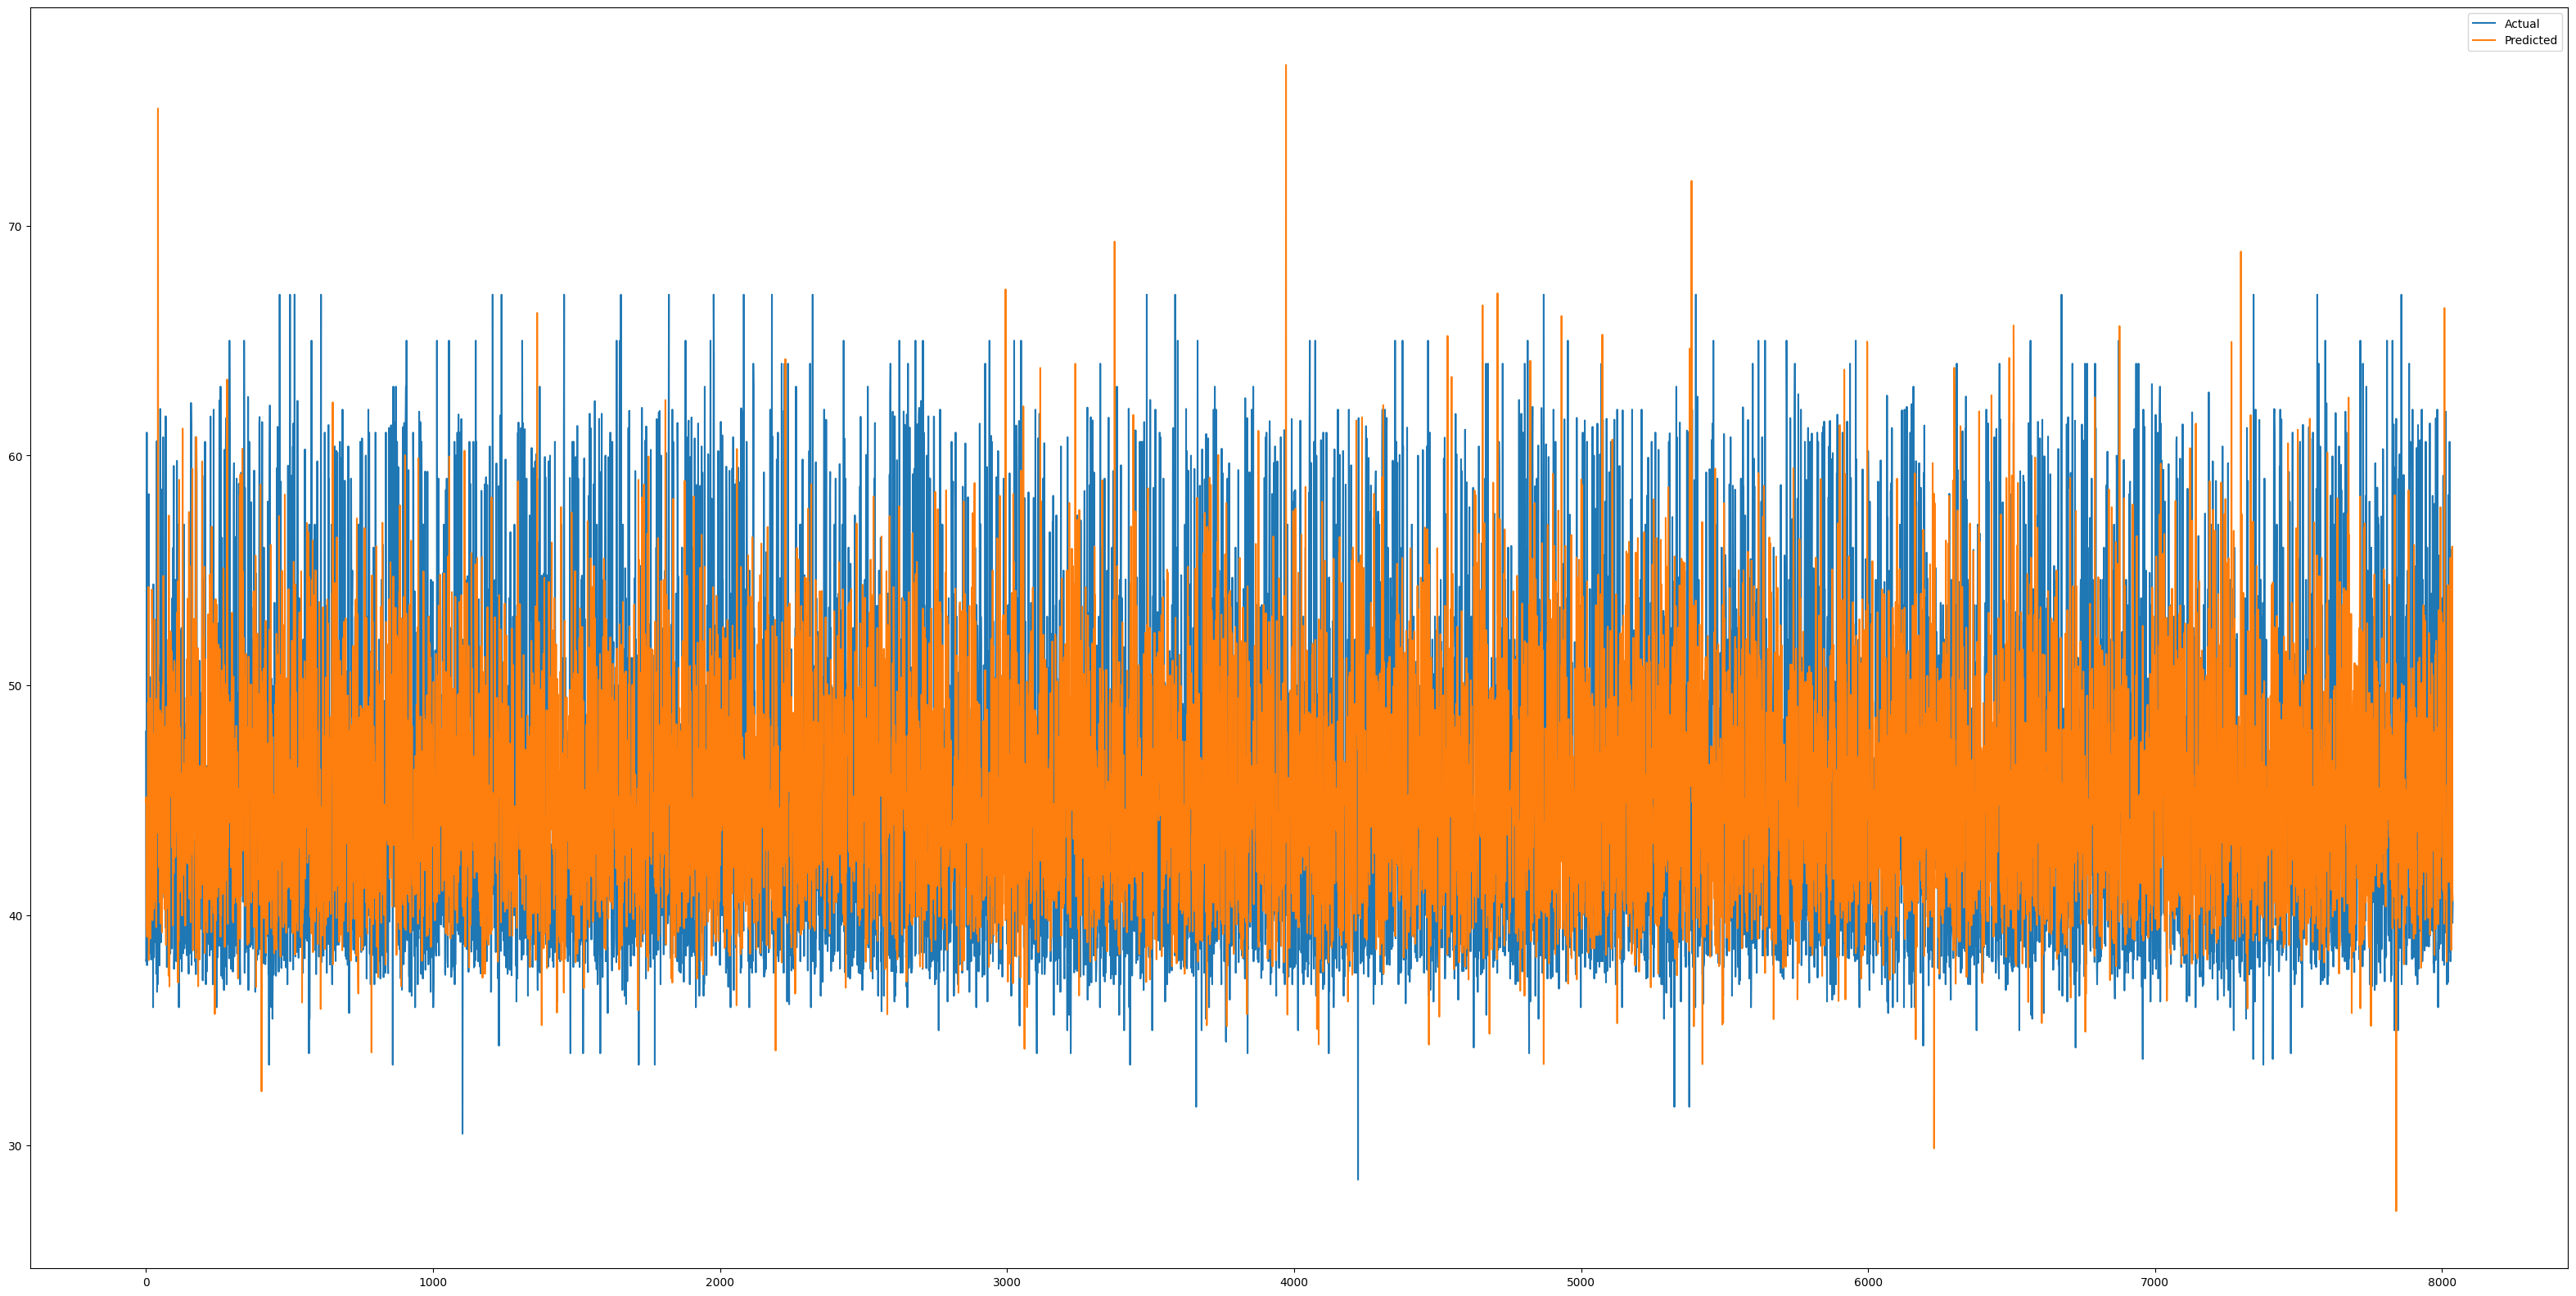

In [13]:
# Plot the data
plt.figure(figsize=(40,20))
plt.plot(np.concatenate((Y_train[:,0], Y_test[:,0])), label='Actual')
plt.plot(np.concatenate((train_predict[:,0], test_predict[:,0])), label='Predicted')
plt.legend()
plt.show()